In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as P
import seaborn as sns

In [2]:
def bootstrapSamp(pb_runA, cov_tot):
    np.random.seed()
    _q = np.random.choice(range(0,len(pb_runA)),size=cov_tot,replace=True,p=pb_runA.astype(np.float))
    sim = np.zeros(len(pb_runA))
    for idx in _q:
        sim[idx] += 1
    return sim

def compute_FFC(base_run, pcr_run, include_nan=False):
    a = base_run/np.sum(base_run)
    b = pcr_run/np.sum(pcr_run)
    old_settings = np.seterr(divide='ignore',invalid='ignore')
    ampratio = b/a
    if include_nan == False:
        ffc = ampratio[np.isfinite(ampratio)]
    else:
        ffc = ampratio
    _=np.seterr(**old_settings)  # reset to default
    return ffc

## PCR sim
def binormSim(n, p, cyc=10):
    # simulate the number of molecules after "c" cycle
    # n: number of template molecules
    # p: probability of success PCR
    for i in range(cyc): 
        n += np.random.binomial(n, p, 1)
    return n.item(0)

In [3]:
"""
ready-to-sequence pool
run36: biased chip, no PCR
run42: PCR non-sat from biased chip
run55: non-biased chip; no PCR
"""
counts36 = np.load("./data/run36.npy")
counts42 = np.load("./data/run42.npy")

## normalize data

In [6]:
# bootstrap sampling with average coverage=30
nseqs = len(counts36)
covSEQ = 20*nseqs
b_run36 = bootstrapSamp(counts36/np.sum(counts36), covSEQ)
b_run42 = bootstrapSamp(counts42/np.sum(counts42), covSEQ)

In [7]:
print np.mean(b_run36), np.mean(b_run42)
print "CV run 36:", np.std(b_run36)/np.mean(b_run36)
print "CV run 42:", np.std(b_run42)/np.mean(b_run42)

20.0 20.0
CV run 36: 0.4074663179152247
CV run 42: 0.44887119015687793


### Fig.4a

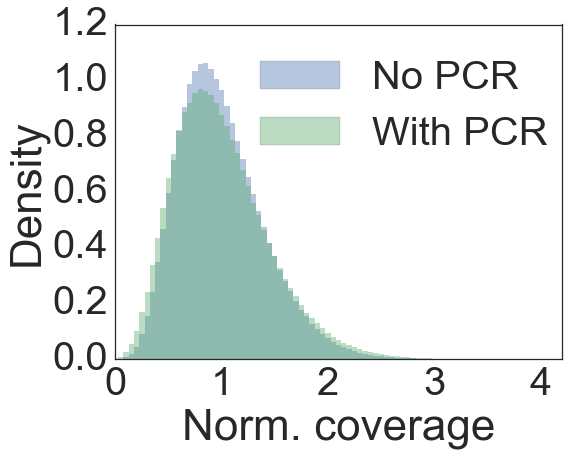

In [8]:
sns.set()
sns.set_context("notebook", font_scale=4.0, rc={"lines.linewidth": 2.5})
sns.set_style("white")
label_texts = ["No PCR", "With PCR"]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
for i, sim in enumerate([b_run36, b_run42]):
    normFac = np.mean(sim)
    norm_sim = sim/normFac
    #weights = np.ones_like(np.array(norm_sim))/float(len(np.array(norm_sim)))
    binEdges = np.arange(-0.5*1.0/normFac,3,1.0/normFac)
    #ax.hist(norm_sim, weights=weights, bins = binEdges, alpha=0.5,edgecolor="None", label=label_texts[i])
    sns.distplot(sim/normFac,bins = binEdges, hist_kws=dict(edgecolor="None"), kde=False,norm_hist=True, hist=True,ax=ax, label=label_texts[i])
ax.set_xlabel("Norm. coverage")
ax.set_ylabel("Density")
ax.legend(bbox_to_anchor=(1.05,1))
#ax.legend(loc="upper right")
ax.set_xlim([0,4.2])
#ax.set_ylim([0, 0.07])
#ax.set_yticks(np.linspace(0,90000,6))
ax.set_xticks([0, 1, 2, 3,4])
#fig = ax.get_figure()
#fig.savefig("./figs/fig_adap_normed_histogram_noVSwithPCR_cov20.pdf", dpi=300, bbox_inches="tight", fmt="pdf")

### Fig.4b

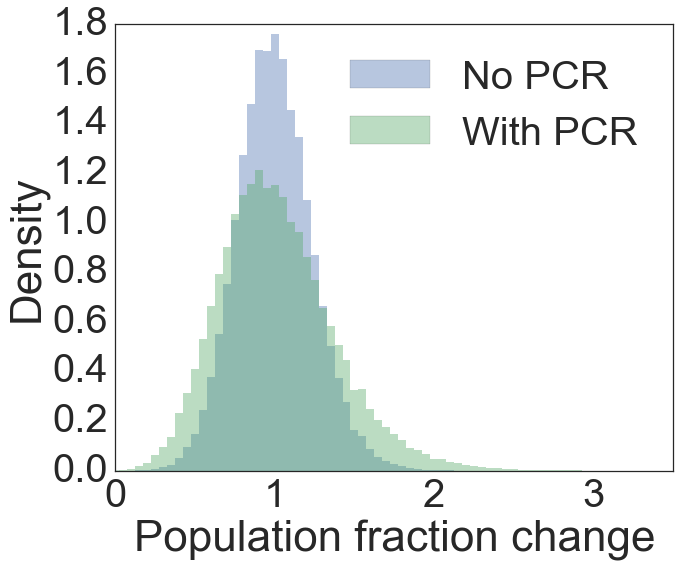

In [9]:
ffc_sim36 = compute_FFC(counts36,b_run36)
ffc_sim42 = compute_FFC(counts36,b_run42)
sns.set_context("notebook", font_scale=4.0, rc={"lines.linewidth": 2.5})
label_texts = ["No PCR", "With PCR"]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
for i, sim in enumerate([ffc_sim36, ffc_sim42]):
    #weights = np.ones_like(np.array(sim))/float(len(np.array(sim)))
    #plt.hist(sim, bins=binEdges, weights=weights, alpha=0.5,edgecolor="None", label=label_texts[i])
    sns.distplot(sim, bins=binEdges, hist=True, hist_kws=dict(edgecolor="None"), norm_hist=True, kde=False, ax=ax, label=label_texts[i])
ax.set_xlabel("Population fraction change")
ax.set_ylabel("Density")
ax.legend(loc="upper right")
ax.set_xlim([0,3.5])
ax.set_xticks([0, 1.0, 2.0, 3.0])
#ax.set_yticks([0, 0.02, 0.04, 0.06, 0.08, 0.1])
#fig.savefig("./figs/fig_adap_popChange_cov20_noVSwithPCR_KDE.pdf", dpi=300, bbox_inches="tight", fmt="pdf")